In [1]:
import sqlite3
import pathlib
from contextlib import closing
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
DB_PATH = pathlib.Path('/') / 'data' / 'declanvk' / 'netflix_prize.sqlite'
CONNECTION = sqlite3.connect(str(DB_PATH))

In [4]:
year_count_query = """
SELECT release_year as Year, count(*) as Count FROM item
GROUP BY release_year
ORDER BY release_year ASC;
"""
year_count_df = pd.read_sql(year_count_query, CONNECTION)

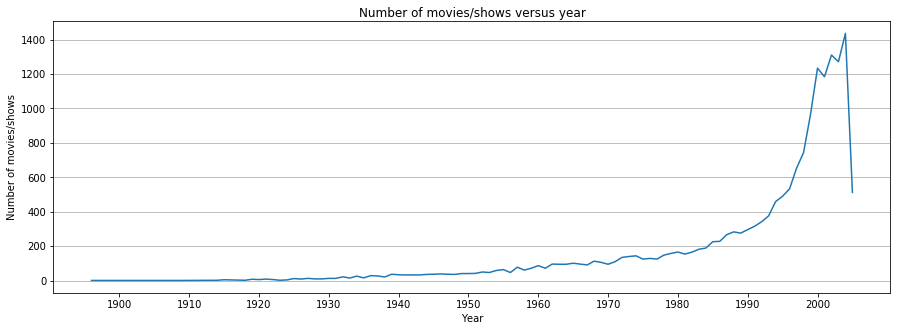

In [5]:
fig = plt.figure(figsize=(15, 5))
plt.plot('Year', 'Count', data=year_count_df);
plt.xlabel('Year')
plt.ylabel('Number of movies/shows')
plt.title('Number of movies/shows versus year')
plt.grid(axis='y')
plt.xticks(np.arange(1900, 2001, 10));

In [22]:
rating_date_count_query = """
SELECT
    date(date) as Date,
    count(*) as Count
FROM rating
GROUP BY Date
ORDER BY Date ASC;
"""

rating_date_df = pd.read_sql(rating_date_count_query, CONNECTION)

In [26]:
rating_date_df['Date'] = pd.to_datetime(rating_date_df['Date'], infer_datetime_format=True)

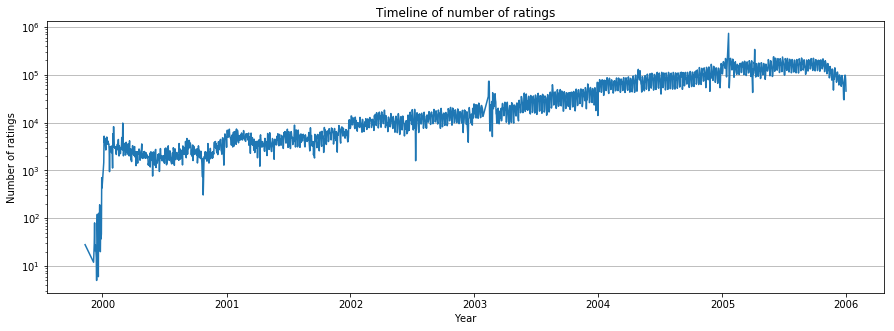

In [31]:
fig = plt.figure(figsize=(15, 5))
plt.plot('Date', 'Count', data=rating_date_df);
plt.xlabel('Year')
plt.ylabel('Number of ratings')
plt.title('Timeline of number of ratings')
plt.grid(axis='y')
plt.yscale('log')

In [6]:
all_ratings_query = """
SELECT
    value as Value,
    count(*) as Count
FROM rating
GROUP BY Value;
"""

all_ratings_df = pd.read_sql(all_ratings_query, CONNECTION)

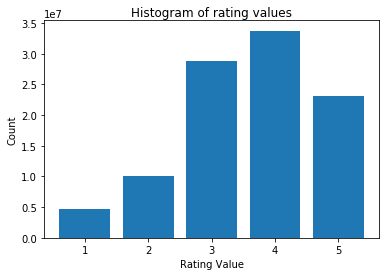

In [7]:
plt.bar('Value', 'Count', data=all_ratings_df);
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.title('Histogram of rating values');

In [8]:
user_average_rating_distribution_query = """
SELECT
    customer_id as CustomerID,
    avg_rating as Average
FROM customer;
"""

user_average_df = pd.read_sql(user_average_rating_distribution_query, CONNECTION)

In [10]:
user_rating_count_distribution_query = """
SELECT
    customer_id as CustomerID,
    rating_count as Count
FROM customer;
"""

user_rating_count_df = pd.read_sql(user_rating_count_distribution_query, CONNECTION)

In [13]:
item_average_rating_distribution_query = """
SELECT
    item_id as ItemID,
    avg_rating as Average
FROM item;
"""

item_average_df = pd.read_sql(item_average_rating_distribution_query, CONNECTION)

In [15]:
item_rating_count_distribution_query = """
SELECT
    item_id as ItemID,
    rating_count as Count
FROM item;
"""

item_rating_count_df = pd.read_sql(item_rating_count_distribution_query, CONNECTION)

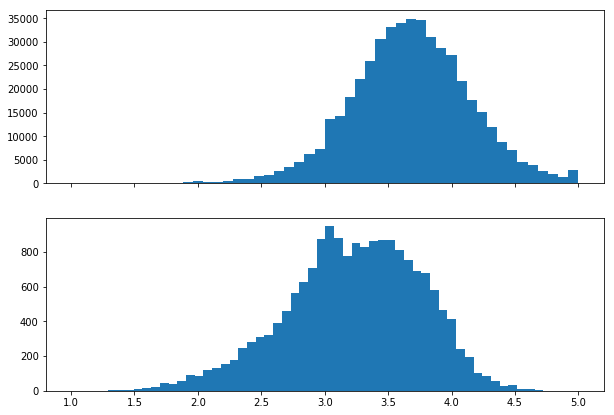

In [79]:
fig, average_axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

average_axes[0].hist(user_average_df.Average, bins=50)
average_axes[1].hist(item_average_df.Average, bins=50);

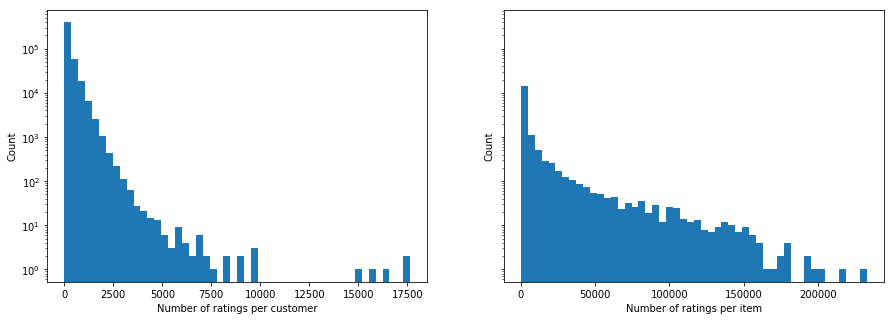

In [97]:
fig, count_axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
count_axes[0].hist(user_rating_count_df.Count, bins=50)
count_axes[0].set_yscale('log')
count_axes[0].set_xlabel('Number of ratings per customer')
count_axes[0].set_ylabel('Count')

count_axes[1].hist(item_rating_count_df.Count, bins=50);
count_axes[1].set_yscale('log')
count_axes[1].set_xlabel('Number of ratings per item')
count_axes[1].set_ylabel('Count');

In [ ]:
# CONNECTION.close()